# 3 直方图Histogramplot
直方图能够准确表现数据的分布，在seaborn中使用distplot函数制作直方图，该章节主要内容有：
1. 基本直方图的绘制 Basic histogram
2. 数据分布与密度信息显示 Control rug and density on seaborn histogram
3. 带箱形图的直方图 Histogram with a boxplot on top
4. 多个变量的直方图 Histogram with several variables
5. 边际图 Marginal plot

In [1]:
#调用seaborn
import seaborn as sns
#调用seaborn自带数据集
df = sns.load_dataset('iris')
#显示数据集
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. 基本直方图的绘制 Basic histogram
+ 绘制默认直方图 Make default histogram 
+ bin的数量设置 Control the number of bins 
+ 垂直直方图 Vertical Histogram

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


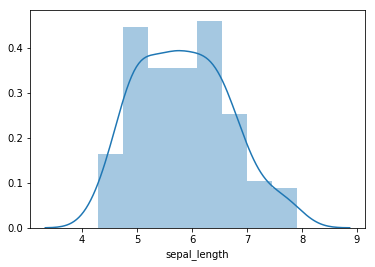

In [2]:
# 绘制默认直方图 Make default histogram 
# displot默认绘制概率密度函数曲线，及kde=True
# 下图纵坐标为在横坐标区域内分布的概率,曲线表示概率密度函数，在区间上积分值为1
sns.distplot( df["sepal_length"]);

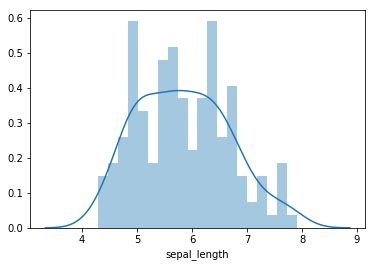

In [3]:
# bin的数量设置 Control the number of bins 
# bin控制直方图的竖直的长方形的数量
sns.distplot( df["sepal_length"], bins=20);

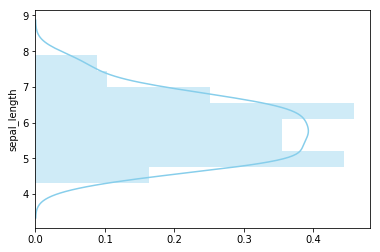

In [4]:
# 垂直直方图 Vertical Histogram
# vertical=True设置直方图垂直
sns.distplot( df["sepal_length"] , color="skyblue", vertical=True);

## 2. 数据分布与密度信息显示 Control rug and density on seaborn histogram
+ 仅显示直方图 Hist only
+ 显示带数据分布和密度的直方图 Hist + Rug + kernel density
+ 密度分布曲线参数修改 To change parameters of density distribution

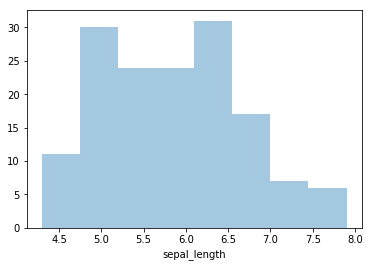

In [5]:
# 仅显示直方图  Hist only
# hist :控制是否显示条形图
# kde :控制是否显示核密度估计图
# rug :控制是否显示观测的小细条（边际毛毯）
sns.distplot( a=df["sepal_length"], hist=True, kde=False, rug=False );

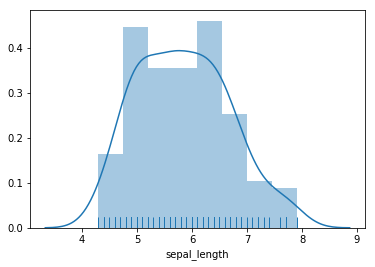

In [6]:
# 显示带数据分布和密度的直方图 Hist + Rug + kernel density
sns.distplot( a=df["sepal_length"], hist=True, kde=True, rug=True );

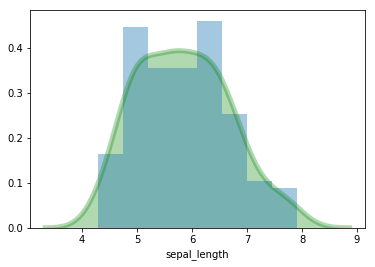

In [7]:
# 密度分布曲线参数修改 To change parameters of density distribution
sns.distplot( a=df["sepal_length"], kde=True,kde_kws={"color": "g", "alpha":0.3, "linewidth": 5, "shade":True });

## 3. 带箱形图的直方图 Histogram with a boxplot on top

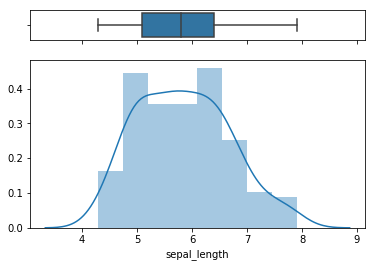

In [8]:
# 此图表主要基于seaborn，但也需要matplotlib，将图形窗口分成两部分
# 导入matplotlib
import matplotlib.pyplot as plt
# Cut the window in 2 parts 将窗口分为两部分
# sharex共享x轴，图像分为上下两部分，上面部分ax_box占比0.15，下面部分ax_hist占比0.85
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part 绘制两种不同的图像
sns.boxplot(df["sepal_length"], ax=ax_box)
sns.distplot(df["sepal_length"], ax=ax_hist)
# Remove x axis name for the boxplot 不显示箱形图的横坐标
ax_box.set(xlabel='');

## 4. 多个变量的直方图 Histogram with several variables
+ 同轴绘制 distributions together
+ 多窗口绘制 several parts

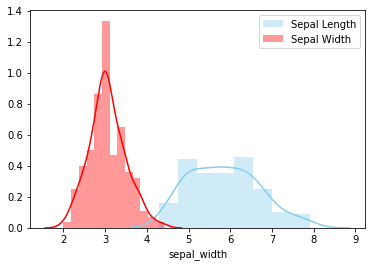

In [19]:
# 同轴绘制 distributions together
# 如果您有多个变量并且想要将它们的分布可视化在一起，您有两个选项：在同一轴上绘制或者将窗口分成几个部分。
# 如果你没有太多变量，并且它们没有重叠，那么同一轴上绘制就更好了
import matplotlib.pyplot as plt
sns.distplot( df["sepal_length"] , color="skyblue", label="Sepal Length");
sns.distplot( df["sepal_width"] , color="red", label="Sepal Width");
plt.legend()

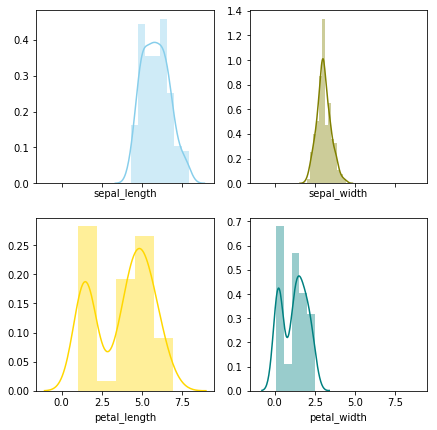

In [17]:
# 多窗口绘制 several parts
import matplotlib.pyplot as plt
# plot 通过matplotlib将图像分为四部分，并且共享x轴
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
# 设定坐标轴位置
sns.distplot( df["sepal_length"] , color="skyblue", ax=axes[0, 0]);
sns.distplot( df["sepal_width"] , color="olive", ax=axes[0, 1]);
sns.distplot( df["petal_length"] , color="gold", ax=axes[1, 0]);
sns.distplot( df["petal_width"] , color="teal", ax=axes[1, 1]);

## 5. 边际图 Marginal plot
+ 边界散点图 scatter
+ 边界回归图 reg
+ 边界残差图 resid
+ 边界核密度图 kde
+ 边界六角图 hex

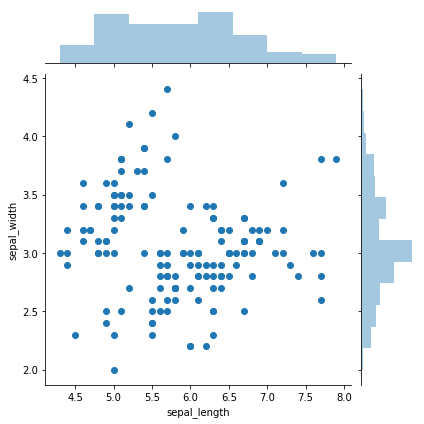

In [26]:
# 边际图能够很好显示两个数值变量之间的关系。
# 中央图表显示其相关性。它通常是散点图，hexbin图，2D直方图或2D密度图。
# 边缘图通常在顶部和右侧，使用直方图或密度图显示2个变量的分布。
# 边际图通过jointplot绘制，主要类型参数为kind
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
# 边际散点图 中间是散点图，边界是直方图
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter');

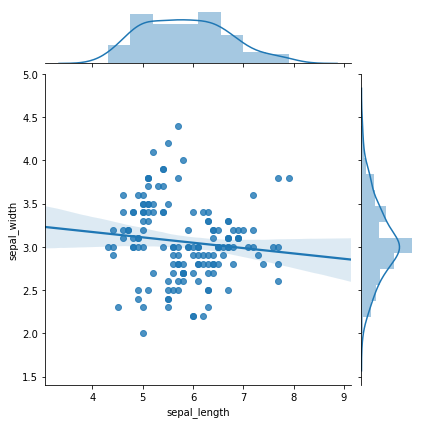

In [27]:
# 边际回归图 中间是带回归方程的散点图，边界是带密度分布的直方图
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='reg');

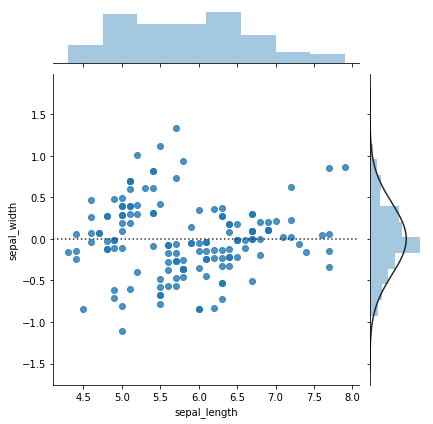

In [33]:
# 边际残差图 中间是带回归方程的散点图，边界是带密度分布的直方图
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='resid');

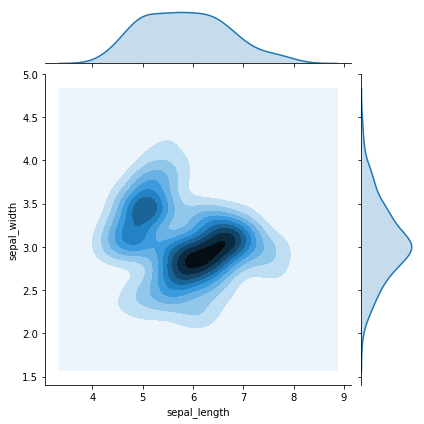

In [31]:
# 边界核密度估计图
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde');

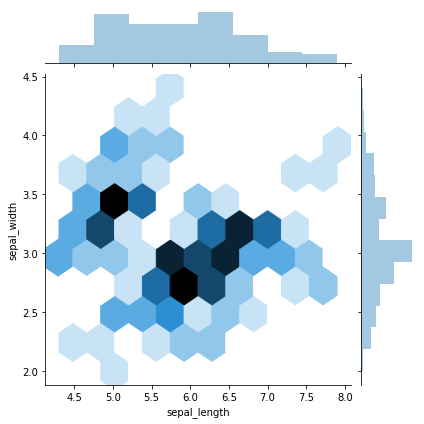

In [29]:
# 边界六角图
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex');